# TD 02

## Exo 1

Facture de branchement c'est le nombre max d'enfant.

On a nos plateau au niveau de feuille de la partie (des plateaux final)

1. Le facteur de branchement du jeu représenté sur l’arbre ci-dessus est de `3`. Non toutes les branches d’un arbre de jeu ne doivent pas être de la même hauteur, car des parties peuvent se finir plus vite que d'autres.

2. Le meilleur plateau pour Ami est le `8` et le meilleur pour Ennemi, c'est le `-4`. Un nœud de l'arbre peut avoir qu'un seul fils, car il y as qu'un seul coup possible (par exemple quand le roi est en échec). C'est une mauvaise chose pour amis, car il ne peut pas choisir son coup.

3. La plus grande valeur possible de la feuille "??" qui permet d'élaguer est `3`.

4.![treeAlphaBeta.png](treeAlphaBeta.png)

5.![treeAlphaBeta.png](treeAlphaBetaCutMoreBranch.png)


## Partie 2

In [ ]:
!pip3 install python-chess

In [228]:
import sys
import time
import chess
import click
from random import randint, choice
from IPython.display import display, clear_output

In [229]:
def run_from_iPython():
  try:
    __IPYTHON__
    return True
  except NameError:
    return False

def printBoard(b):
  if (run_from_iPython()):
    clear_output(wait=True)
    display(b)
  else:
    print("\033[8A%s" % b)

In [230]:
def exhaustiveSearch(b, d, limiteTime=None):
  def aux(b, d):
    if d == 0:
      return 1
    if limiteTime is not None and time.time() > limiteTime:
      raise TimeoutError
    if b.is_game_over():
      print("Resultat : ", b.result())
      return 1
    nbNodes = 1
    for m in b.generate_legal_moves():
      b.push(m)
      nbNodes += aux(b, d - 1)
      b.pop()
    return nbNodes

  start_time = time.time()

  print("==================")
  print("Depth :", d)
  nbNodes = aux(b, d)
  print("Nb nodes :", nbNodes)
  print("In %0.2f seconds" % (time.time() - start_time))

In [231]:
board = chess.Board()

try:
  for i in range(10):
    exhaustiveSearch(board, i, time.time() + 30)
except TimeoutError:
  print("Time is over")

Depth : 0
Nb nodes : 1
In 0.00 seconds
Depth : 1
Nb nodes : 21
In 0.00 seconds
Depth : 2
Nb nodes : 421
In 0.01 seconds
Depth : 3
Nb nodes : 9323
In 0.15 seconds
Depth : 4
Nb nodes : 206604
In 2.99 seconds
Depth : 5
Resultat :  0-1
Resultat :  0-1
Time is over


1. En moins de 30 seconds on peut aller a une profondeur de `4`. On s'arrête a la 5ème.

| Profondeur :       | 1  |  2  |  3   |   4    |
|:------------------:|:--:|:---:|:----:|:------:|
| Nombre de noeuds : | 21 | 421 | 9323 | 206604 |

2.

In [232]:
# king, queen, rook, bishop, knight, pawn
pawnsValues = {'k': 200, 'q': 9, 'r': 5, 'b': 3, 'n': 3, 'p': 1}

def Shanon(b):
  score = 0
  nbPawns = {'k': 0, 'q': 0, 'r': 0, 'b': 0, 'n': 0,
             'p': 0, 'K': 0, 'Q': 0, 'R': 0, 'B': 0, 'N': 0, 'P': 0}

  for pos, pieces in b.piece_map().items():
    bonus = 0
    if (pieces.symbol() == 'p'):
      bonus = chess.square_rank(pos) / 10
    elif (pieces.symbol() == 'P'):
      bonus = (7 - chess.square_rank(pos)) / 10
    nbPawns[pieces.symbol()] += 1 + bonus

  for key in pawnsValues:
    score += (pawnsValues[key] * (nbPawns[key] - nbPawns[key.upper()]))

  return score

In [233]:
Shanon(chess.Board())

0.0

3.

In [234]:
def miniMax(b, d, a, limiteTime=None):
  if d < 0:
    d = 0

  d += 1

  def aux(b, d):
    if d == 0 or b.is_game_over():
      return 1, Shanon(b), None

    if limiteTime is not None and time.time() > limiteTime:
      raise TimeoutError

    countNodes = 1
    bestScore = None
    bestMove = None
    for move in b.generate_legal_moves():
      b.push(move)
      nbNodes, score, _ = aux(b, d - 1)
      b.pop()

      countNodes += nbNodes

      if bestScore == None:
        bestScore = score
        bestMove = [move]
      else:
        newScore = b.turn == a if max(bestScore, score) else min(bestScore, score)

        if newScore == bestScore:
          bestMove.append(move)
        else:
          bestMove = [move]
          bestScore = newScore
    return countNodes, bestScore, bestMove[randint(0, len(bestMove) - 1)]
  return aux(b, d)

In [235]:
def MiniMax(b, d, a, limiteTime=None):
  return miniMax(b, d, a, limiteTime)[2]

In [236]:
# Iterative Deepening
def miniMaxID(b, d, a, seconds, debug=False):
  move = None
  try:
    for d_bis in range(d):
      if debug:
        print("==================")
        print("Depth : %d" % d_bis)
      start_time = time.time()
      nbNodes, score, newMove = miniMax(b, d_bis, a, time.time() + seconds)
      if debug:
        print("Nb nodes : %d" % nbNodes)
        print("Move : %s" % newMove)
        print("In %0.2f seconds" % (time.time() - start_time))
      move = newMove
  except TimeoutError:
    if debug:
      print("Time is over")
  return move

In [237]:
miniMaxID(chess.Board(), 8, chess.WHITE, 30, True)

Depth : 0
Nb nodes : 21
Move : b2b3
In 0.00 seconds
Depth : 1
Nb nodes : 421
Move : g2g3
In 0.04 seconds
Depth : 2
Nb nodes : 9323
Move : b1c3
In 0.96 seconds
Depth : 3
Nb nodes : 206604
Move : b2b3
In 20.69 seconds
Depth : 4
Time is over


Move.from_uci('b2b3')

In [238]:
board = chess.Board()
print("level 1 :", MiniMax(board, 0, chess.WHITE))
print("level 2 :", MiniMax(board, 1, chess.WHITE))
print("level 3 :", MiniMax(board, 2, chess.WHITE))

level 1 : g2g4
level 2 : g2g3
level 3 : b1a3


4.
Match Joueur Aléatoire contre Minimax niveau 3

In [239]:
def randomMove(b):
    return choice([m for m in b.generate_legal_moves()])

def match1(b, debug):
  if debug and not run_from_iPython(): print(b)
  while not b.is_game_over():
    if debug: printBoard(b)

    if b.turn == chess.WHITE:
      nextMove = randomMove(b)
    else:
      nextMove = MiniMax(b, 2, chess.BLACK)

    b.push(nextMove)
  print("Result : ", b.result())

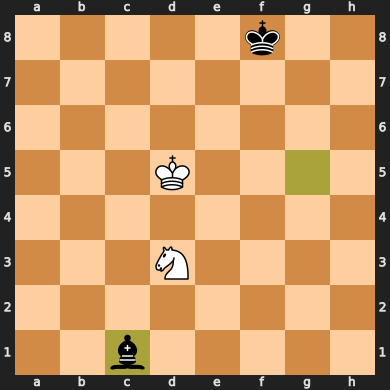

Result :  1/2-1/2


In [240]:
match1(chess.Board(), True)

Match Minimax niveau 1 contre Minimax niveau 3

In [241]:
def match2(b, debug):
  if debug and not run_from_iPython(): print(b)
  while not b.is_game_over():
    if debug: printBoard(b)

    if b.turn == chess.WHITE:
      nextMove = MiniMax(b, 0, chess.WHITE)
    else:
      nextMove = MiniMax(b, 2, chess.BLACK)

    b.push(nextMove)
  print("Result : ", b.result())

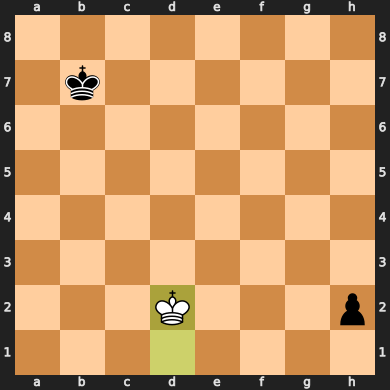

Result :  1/2-1/2


In [242]:
match2(chess.Board(), True)

## Partie 3

1.

In [243]:
def alphaBeta(b, d, a, limiteTime=None):
  if d < 0:
    d = 0

  d += 1

  # maxScore = alpha
  # minScore = beta
  def aux(b, d, alpha, beta):
    if d == 0 or b.is_game_over():
      return 1, Shanon(b), None

    if limiteTime is not None and time.time() > limiteTime:
      raise TimeoutError

    countNodes = 1
    bestMove = []
    for move in b.generate_legal_moves():
      b.push(move)
      nbNodes, score, _ = aux(b, d - 1, alpha, beta)
      b.pop()

      countNodes += nbNodes

      if b.turn == a:
        newAlpha = max(alpha, score)
        if newAlpha >= beta:
          return countNodes, beta, move

        if newAlpha == alpha:
          bestMove.append(move)
        else:
          bestMove = [move]
          alpha = newAlpha
      else:
        newBeta = min(beta, score)
        if alpha >= newBeta:
          return countNodes, alpha, move

        if newBeta == beta:
          bestMove.append(move)
        else:
          bestMove = [move]
          beta = newBeta

    return countNodes, b.turn == a if alpha else beta, bestMove[randint(0, len(bestMove) - 1)]
  return aux(b, d, -sys.maxsize - 1, sys.maxsize)

J'ai coder l'`Iterative Deepening` (`alphaBetaID()`) avant de faire la comparaison. La comparaison est donc plus loin.

Match Minimax contre α − β

In [244]:
def match3(b, debug):
  if debug and not run_from_iPython(): print(b)
  while not b.is_game_over():
    if debug: printBoard(b)

    if b.turn == chess.WHITE:
      nextMove = alphaBeta(b, 2, b.turn)[2]
    else:
      nextMove = MiniMax(b, 2, chess.BLACK)

    b.push(nextMove)
  print("Result : ", b.result())

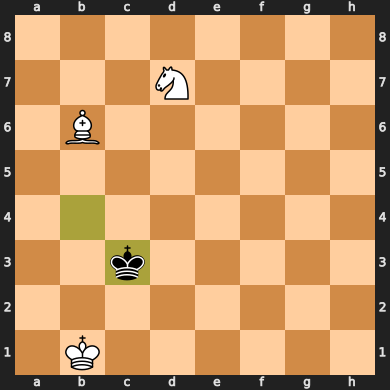

Result :  1/2-1/2


In [245]:
match3(chess.Board(), True)

2.

In [246]:
# Iterative Deepening
def alphaBetaID(b, d, a, seconds, debug=False):
  move = None
  try:
    for d_bis in range(d):
      if debug:
        print("==================")
        print("Depth : %d" % d_bis)
      start_time = time.time()
      nbNodes, score, newMove = alphaBeta(b, d_bis, a, time.time() + seconds)
      if debug:
        print("Nb nodes : %d" % nbNodes)
        print("Move : %s" % newMove)
        print("In %0.2f seconds" % (time.time() - start_time))
      move = newMove
  except TimeoutError:
    if debug:
      print("Time is over")
  return move

In [247]:
alphaBetaID(board, 8, chess.WHITE, 10, True)

Depth : 0
Nb nodes : 21
Move : a2a4
In 0.01 seconds
Depth : 1
Nb nodes : 195
Move : g2g4
In 0.02 seconds
Depth : 2
Nb nodes : 1322
Move : b2b3
In 0.21 seconds
Depth : 3
Nb nodes : 6799
Move : d2d3
In 1.00 seconds
Depth : 4
Nb nodes : 44812
Move : a2a4
In 4.35 seconds
Depth : 5
Time is over


Move.from_uci('a2a4')

Comparaison de la question 1 :

Avec une partie partie sans aucun coup jouer

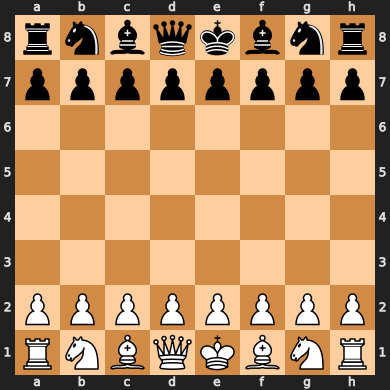

In [248]:
board = chess.Board()
print(board)
printBoard(board)

In [249]:
print("MiniMax :")
miniMaxID(board, 8, chess.WHITE, 30, True)

MiniMax :
Depth : 0
Nb nodes : 21
Move : f2f4
In 0.00 seconds
Depth : 1
Nb nodes : 421
Move : c2c3
In 0.08 seconds
Depth : 2
Nb nodes : 9323
Move : a2a3
In 1.02 seconds
Depth : 3
Nb nodes : 206604
Move : d2d4
In 24.07 seconds
Depth : 4
Time is over


Move.from_uci('d2d4')

In [250]:
print("Alpha-beta :")
alphaBetaID(board, 8, chess.WHITE, 10, True)

Alpha-beta :
Depth : 0
Nb nodes : 23
Move : h2h4
In 0.01 seconds
Depth : 1
Nb nodes : 99
Move : f3g1
In 0.02 seconds
Depth : 2
Nb nodes : 1500
Move : g2g3
In 0.22 seconds
Depth : 3
Nb nodes : 4736
Move : h1g1
In 0.42 seconds
Depth : 4
Nb nodes : 43273
Move : f3g1
In 4.71 seconds
Depth : 5
Nb nodes : 103041
Move : g2g3
In 9.18 seconds
Depth : 6
Time is over


Move.from_uci('g2g3')

Avec une partie partie avec des coups jouer

In [251]:
board = chess.Board()
board.push(chess.Move.from_uci("d2d4"))
board.push(chess.Move.from_uci("c7c5"))
board.push(chess.Move.from_uci("d1d3"))
board.push(chess.Move.from_uci("g8f6"))
print(board)
printBoard(board)

In [252]:
print("MiniMax :")
miniMaxID(board, 8, chess.WHITE, 30, True)

MiniMax :
Depth : 0
Nb nodes : 45
Move : f2f3
In 0.01 seconds
Depth : 1
Nb nodes : 1134
Move : b2b3
In 0.12 seconds
Depth : 2
Nb nodes : 44167
Move : c1e3
In 4.75 seconds
Depth : 3
Time is over


Move.from_uci('c1e3')

In [253]:
print("Alpha-beta :")
alphaBetaID(board, 8, chess.WHITE, 10, True)

Alpha-beta :
Depth : 0
Nb nodes : 25
Move : a7a5
In 0.01 seconds
Depth : 1
Nb nodes : 126
Move : e7e5
In 0.01 seconds
Depth : 2
Nb nodes : 1756
Move : a7a6
In 0.18 seconds
Depth : 3
Nb nodes : 22940
Move : g7g5
In 2.18 seconds
Depth : 4
Nb nodes : 109673
Move : f6g4
In 9.75 seconds
Depth : 5
Time is over


Move.from_uci('f6g4')

On voit que pour uns profondeur de `0` et `1` il y a peu de différence de nœuds explorés.
Par contre pour une profondeur plus grand, on voit que `alpha-beta` parcoure beaucoup moins de nœuds.
Et `alpha-beta` et nettement plus rapide.
Sur une partie déjà commencée, on peut voir que `alpha-beta` est bien plus efficace que `miniMax`.

3.

In [254]:
def humanMove(b):
  while True:
    userUCI = input("Your move (ex: a2a4) :")

    try:
      move = chess.Move.from_uci(userUCI)
      if any(str(move) == str(m) for m in b.generate_legal_moves()):
        return move
      else:
        print("Bad move")
        print("Possible move :")
        for m in b.generate_legal_moves():
          print(m, end=', ')
        print("")
    except:
      print("Bad instruction")

def matchHuman(b):
  if click.confirm("You want to start?", default=True):
    playerColor = chess.WHITE
  else:
    playerColor = chess.BLACK

  if not run_from_iPython(): print(b)
  while not b.is_game_over():
    printBoard(b)

    if b.turn == playerColor:
      nextMove = humanMove(b)
    else:
      nextMove = alphaBetaID(b, 2, b.turn, 10)

    b.push(nextMove)
  print("Result : ", b.result())

In [ ]:
matchHuman(chess.Board())